In [8]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

# Load Dataset

In [7]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [9]:
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

# MLP with one output neuron

In [4]:
# define model using two dense (fully connected) layers
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=1))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,433 (1.54 MB)

 Trainable params: 402,433 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# compile model by:
# A loss function – to measure performance on the training data, to steer in the right direction
# An optimizer – to update the network
model.compile(loss='mse', optimizer='adam')

In [10]:
# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=10,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
7
[7.21]


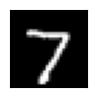

2
[2.22]


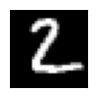

1
[1.22]


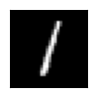

0
[0.]


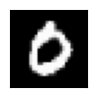

4
[3.96]


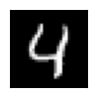

1
[1.12]


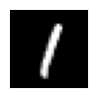

4
[5.]


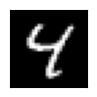

9
[9.46]


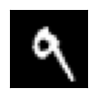

In [11]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [12]:
accuracy = np.average(np.round(y_pred[:, 0]) == y_test) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 67.7 %


In [13]:
np.min(y_pred)

np.float32(-1.9831804)

# MLP with categorical output

In [14]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

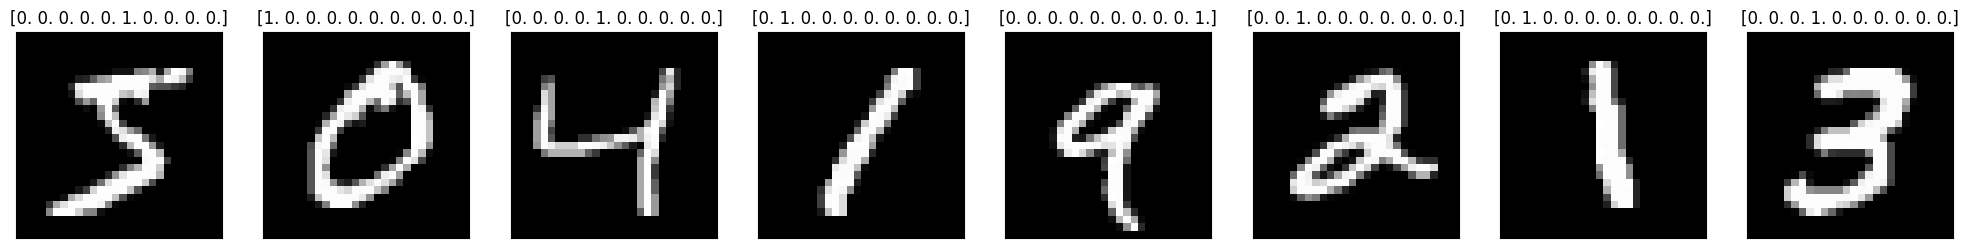

In [15]:
# show dataset
plt.figure(figsize=(25,4))
for i in range(8):
  plt.subplot(1,8,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(str(y_train[i]))

In [16]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# compile model
model.compile(loss='mse', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=10,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[ 0.01  0.02  0.03 -0.    0.01  0.02  0.    0.87  0.01  0.01]


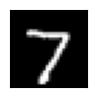

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[-0.02 -0.01  0.88  0.08  0.01 -0.04 -0.   -0.03  0.05  0.04]


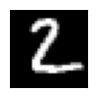

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 2.66e-02  9.51e-01 -3.48e-02  1.88e-03 -6.03e-03  5.92e-03 -4.50e-04 -2.70e-02  4.77e-02  2.91e-02]


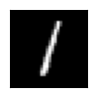

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 9.97e-01  9.85e-04  4.86e-02 -3.04e-03 -4.55e-03 -1.11e-02  4.33e-04 -5.53e-03  6.27e-03 -1.05e-02]


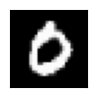

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[ 0.01  0.   -0.06  0.01  0.98  0.01 -0.03  0.13  0.04 -0.05]


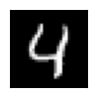

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.01  1.   -0.02  0.   -0.01  0.   -0.    0.02 -0.02  0.01]


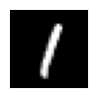

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[ 0.03 -0.    0.02  0.03  0.73  0.03  0.02  0.02  0.06  0.07]


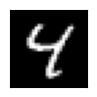

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[-0.05  0.02  0.01 -0.05 -0.02  0.   -0.02 -0.06  0.14  1.02]


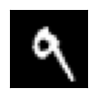

In [18]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [19]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 98.08 %


# Add sigmoid activation

In [20]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# compile model
model.compile(loss='mse', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=10,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[7.62e-16 2.77e-16 1.08e-11 6.93e-10 3.18e-19 1.43e-17 2.72e-21 1.00e+00 4.62e-18 1.58e-13]


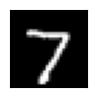

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2.34e-15 5.07e-10 1.00e+00 5.10e-13 1.46e-27 2.16e-13 2.19e-15 1.99e-21 1.08e-12 2.09e-16]


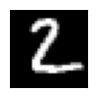

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.46e-12 1.00e+00 1.16e-08 4.80e-13 1.68e-07 1.41e-10 1.45e-10 6.29e-06 4.80e-07 1.26e-11]


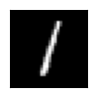

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.00e+00 6.81e-11 5.24e-09 1.47e-13 1.69e-11 5.14e-12 8.63e-09 5.12e-08 5.30e-16 1.11e-09]


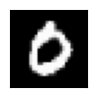

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.45e-11 1.42e-15 8.16e-10 1.51e-15 1.00e+00 5.84e-13 9.49e-12 5.05e-09 2.60e-11 2.72e-06]


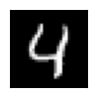

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.93e-15 1.00e+00 1.52e-13 3.38e-15 1.02e-08 9.60e-15 4.10e-15 1.79e-05 5.82e-09 2.87e-14]


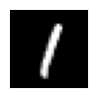

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[5.95e-17 2.56e-16 3.02e-12 2.22e-14 1.00e+00 1.82e-11 2.96e-14 1.48e-08 1.13e-06 3.00e-07]


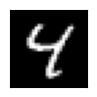

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[4.08e-15 4.55e-11 2.46e-08 2.28e-05 1.50e-07 6.47e-11 4.99e-18 7.42e-10 4.91e-12 1.00e+00]


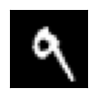

In [42]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [43]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(acc uracy))

accuracy = 98.33 %


# Add softmax activation

In [27]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# compile model
model.compile(loss='mse', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=10,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.65e-09 2.10e-10 7.87e-07 1.14e-05 6.73e-14 4.05e-08 4.64e-14 1.00e+00 1.06e-08 7.98e-08]


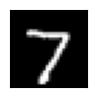

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[3.50e-10 1.06e-03 9.99e-01 2.79e-05 1.37e-13 5.14e-08 1.01e-07 1.11e-13 1.56e-06 1.68e-12]


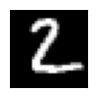

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.18e-06 9.99e-01 2.31e-05 3.02e-06 2.58e-04 6.79e-06 1.09e-05 4.79e-04 4.61e-04 1.09e-06]


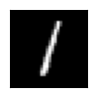

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.99e-01 8.40e-08 5.83e-04 1.34e-06 4.30e-08 7.22e-05 5.86e-05 2.53e-05 1.83e-09 5.20e-06]


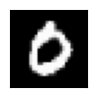

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[3.36e-08 1.22e-09 3.94e-06 1.02e-09 9.99e-01 6.68e-08 3.07e-07 4.39e-05 3.21e-07 5.79e-04]


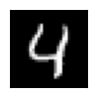

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.42e-08 1.00e+00 2.54e-07 2.20e-07 3.32e-05 4.14e-09 7.65e-09 1.87e-04 7.17e-06 3.99e-08]


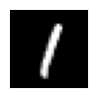

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[3.94e-11 7.90e-09 3.66e-07 9.06e-09 1.00e+00 2.66e-06 6.97e-09 1.18e-05 2.32e-04 4.74e-05]


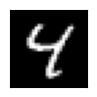

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3.00e-09 1.58e-06 1.54e-03 1.14e-03 9.22e-05 4.88e-05 2.62e-08 2.41e-04 8.95e-05 9.97e-01]


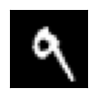

In [29]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [30]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 98.21 %


# Use cross entropy loss

In [32]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=10,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[8.22e-10 2.37e-11 7.77e-08 2.23e-05 1.03e-12 5.37e-10 2.12e-15 1.00e+00 2.20e-09 1.58e-07]


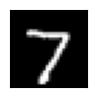

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[9.02e-12 6.89e-08 1.00e+00 2.69e-10 5.04e-19 1.68e-08 3.66e-10 6.99e-17 2.38e-07 2.09e-13]


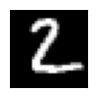

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.21e-08 1.00e+00 6.31e-06 4.89e-09 2.58e-06 5.70e-07 9.45e-07 7.00e-05 2.32e-04 7.62e-08]


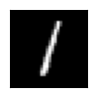

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.00e+00 7.08e-13 2.24e-07 4.02e-10 2.78e-10 1.74e-08 1.30e-07 8.45e-08 2.41e-12 1.75e-07]


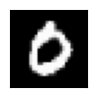

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[4.44e-07 7.54e-12 1.93e-07 1.70e-11 9.98e-01 2.93e-09 1.64e-07 1.73e-05 2.16e-07 1.71e-03]


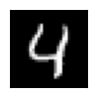

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.60e-10 1.00e+00 3.69e-09 6.44e-11 6.64e-07 3.23e-10 4.44e-10 3.18e-04 5.13e-06 2.09e-09]


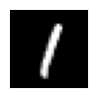

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.26e-12 1.38e-10 5.66e-10 4.59e-10 1.00e+00 7.23e-07 4.63e-10 4.55e-06 1.14e-04 8.78e-05]


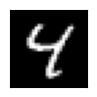

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[6.20e-11 2.26e-08 2.08e-06 7.82e-05 1.86e-06 3.53e-08 4.67e-13 2.34e-06 1.33e-07 1.00e+00]


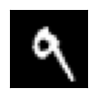

In [36]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [37]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 97.94 %


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.29e-06 1.31e-05 4.19e-06 7.05e-06 2.93e-02 9.41e-08 2.08e-04 6.46e-07 7.81e-06 9.70e-01]


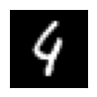

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3.31e-05 3.68e-12 9.85e-06 5.53e-04 2.94e-13 5.39e-05 3.50e-11 1.51e-08 5.00e-01 4.99e-01]


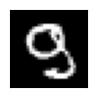

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.18e-05 6.54e-12 1.62e-06 1.03e-03 1.70e-10 3.51e-03 2.70e-08 1.67e-06 5.99e-01 3.97e-01]


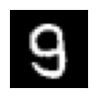

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.37e-09 8.86e-10 9.91e-01 3.42e-08 9.81e-06 2.50e-07 8.56e-03 1.44e-07 3.00e-08 7.53e-14]


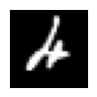

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[5.18e-07 1.16e-06 6.46e-03 4.75e-04 5.33e-14 1.86e-08 1.57e-12 9.88e-01 5.36e-03 4.23e-06]


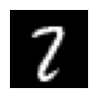

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[2.32e-10 4.62e-06 2.11e-07 7.17e-01 3.25e-10 2.83e-01 3.86e-08 5.27e-12 1.14e-06 7.77e-06]


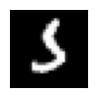

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[5.77e-07 9.84e-05 4.01e-04 4.76e-01 3.30e-08 2.99e-08 4.39e-09 5.24e-01 7.22e-06 4.88e-05]


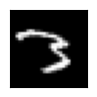

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[9.97e-01 3.12e-14 9.91e-10 1.83e-11 4.47e-11 3.01e-05 3.34e-03 4.38e-07 5.67e-09 5.56e-09]


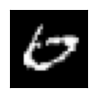

In [35]:
# show errors
idx = np.where(np.argmax(y_pred, axis=1) != np.argmax(y_test, axis=1))[0]
for i in idx[:8]:
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

Accuracy = 98.45 %
[[ 972    1    1    1    1    0    1    1    2    0]
 [   0 1124    4    1    0    1    2    1    2    0]
 [   2    0 1019    1    0    0    1    5    4    0]
 [   0    0    2  999    0    2    0    2    1    4]
 [   1    1    3    1  966    0    2    0    0    8]
 [   2    0    0   10    1  873    1    1    4    0]
 [   3    3    1    1    2    2  946    0    0    0]
 [   1    2    6    1    0    0    0 1011    5    2]
 [   2    0    3    5    4    0    0    4  954    2]
 [   1    2    0    5   10    3    0    4    3  981]]
[[9.92e-01 1.02e-03 1.02e-03 1.02e-03 1.02e-03 0.00e+00 1.02e-03 1.02e-03 2.04e-03 0.00e+00]
 [0.00e+00 9.90e-01 3.52e-03 8.81e-04 0.00e+00 8.81e-04 1.76e-03 8.81e-04 1.76e-03 0.00e+00]
 [1.94e-03 0.00e+00 9.87e-01 9.69e-04 0.00e+00 0.00e+00 9.69e-04 4.84e-03 3.88e-03 0.00e+00]
 [0.00e+00 0.00e+00 1.98e-03 9.89e-01 0.00e+00 1.98e-03 0.00e+00 1.98e-03 9.90e-04 3.96e-03]
 [1.02e-03 1.02e-03 3.05e-03 1.02e-03 9.84e-01 0.00e+00 2.04e-03 0.00e+00 0.00

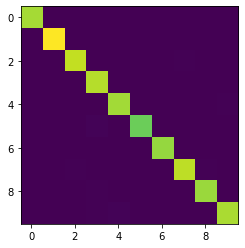

In [ ]:
# plot confusion matrix
import sklearn.metrics

y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print('Accuracy = {} %'.format(100 * np.sum(y_pred == y_true) / len(y_true)))

conf = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)

conf_norm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='true')
print(conf_norm)


In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/My Drive/model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('/content/drive/My Drive/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/model.h5")
print("Loaded model from disk")

Loaded model from disk
